In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/data/cleaned_dataset.csv'
data = pd.read_csv(file_path)

In [28]:
# Function to plot scatter plots between HALE and other indicators
def plot_relationships(x_column, y_column, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.6)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


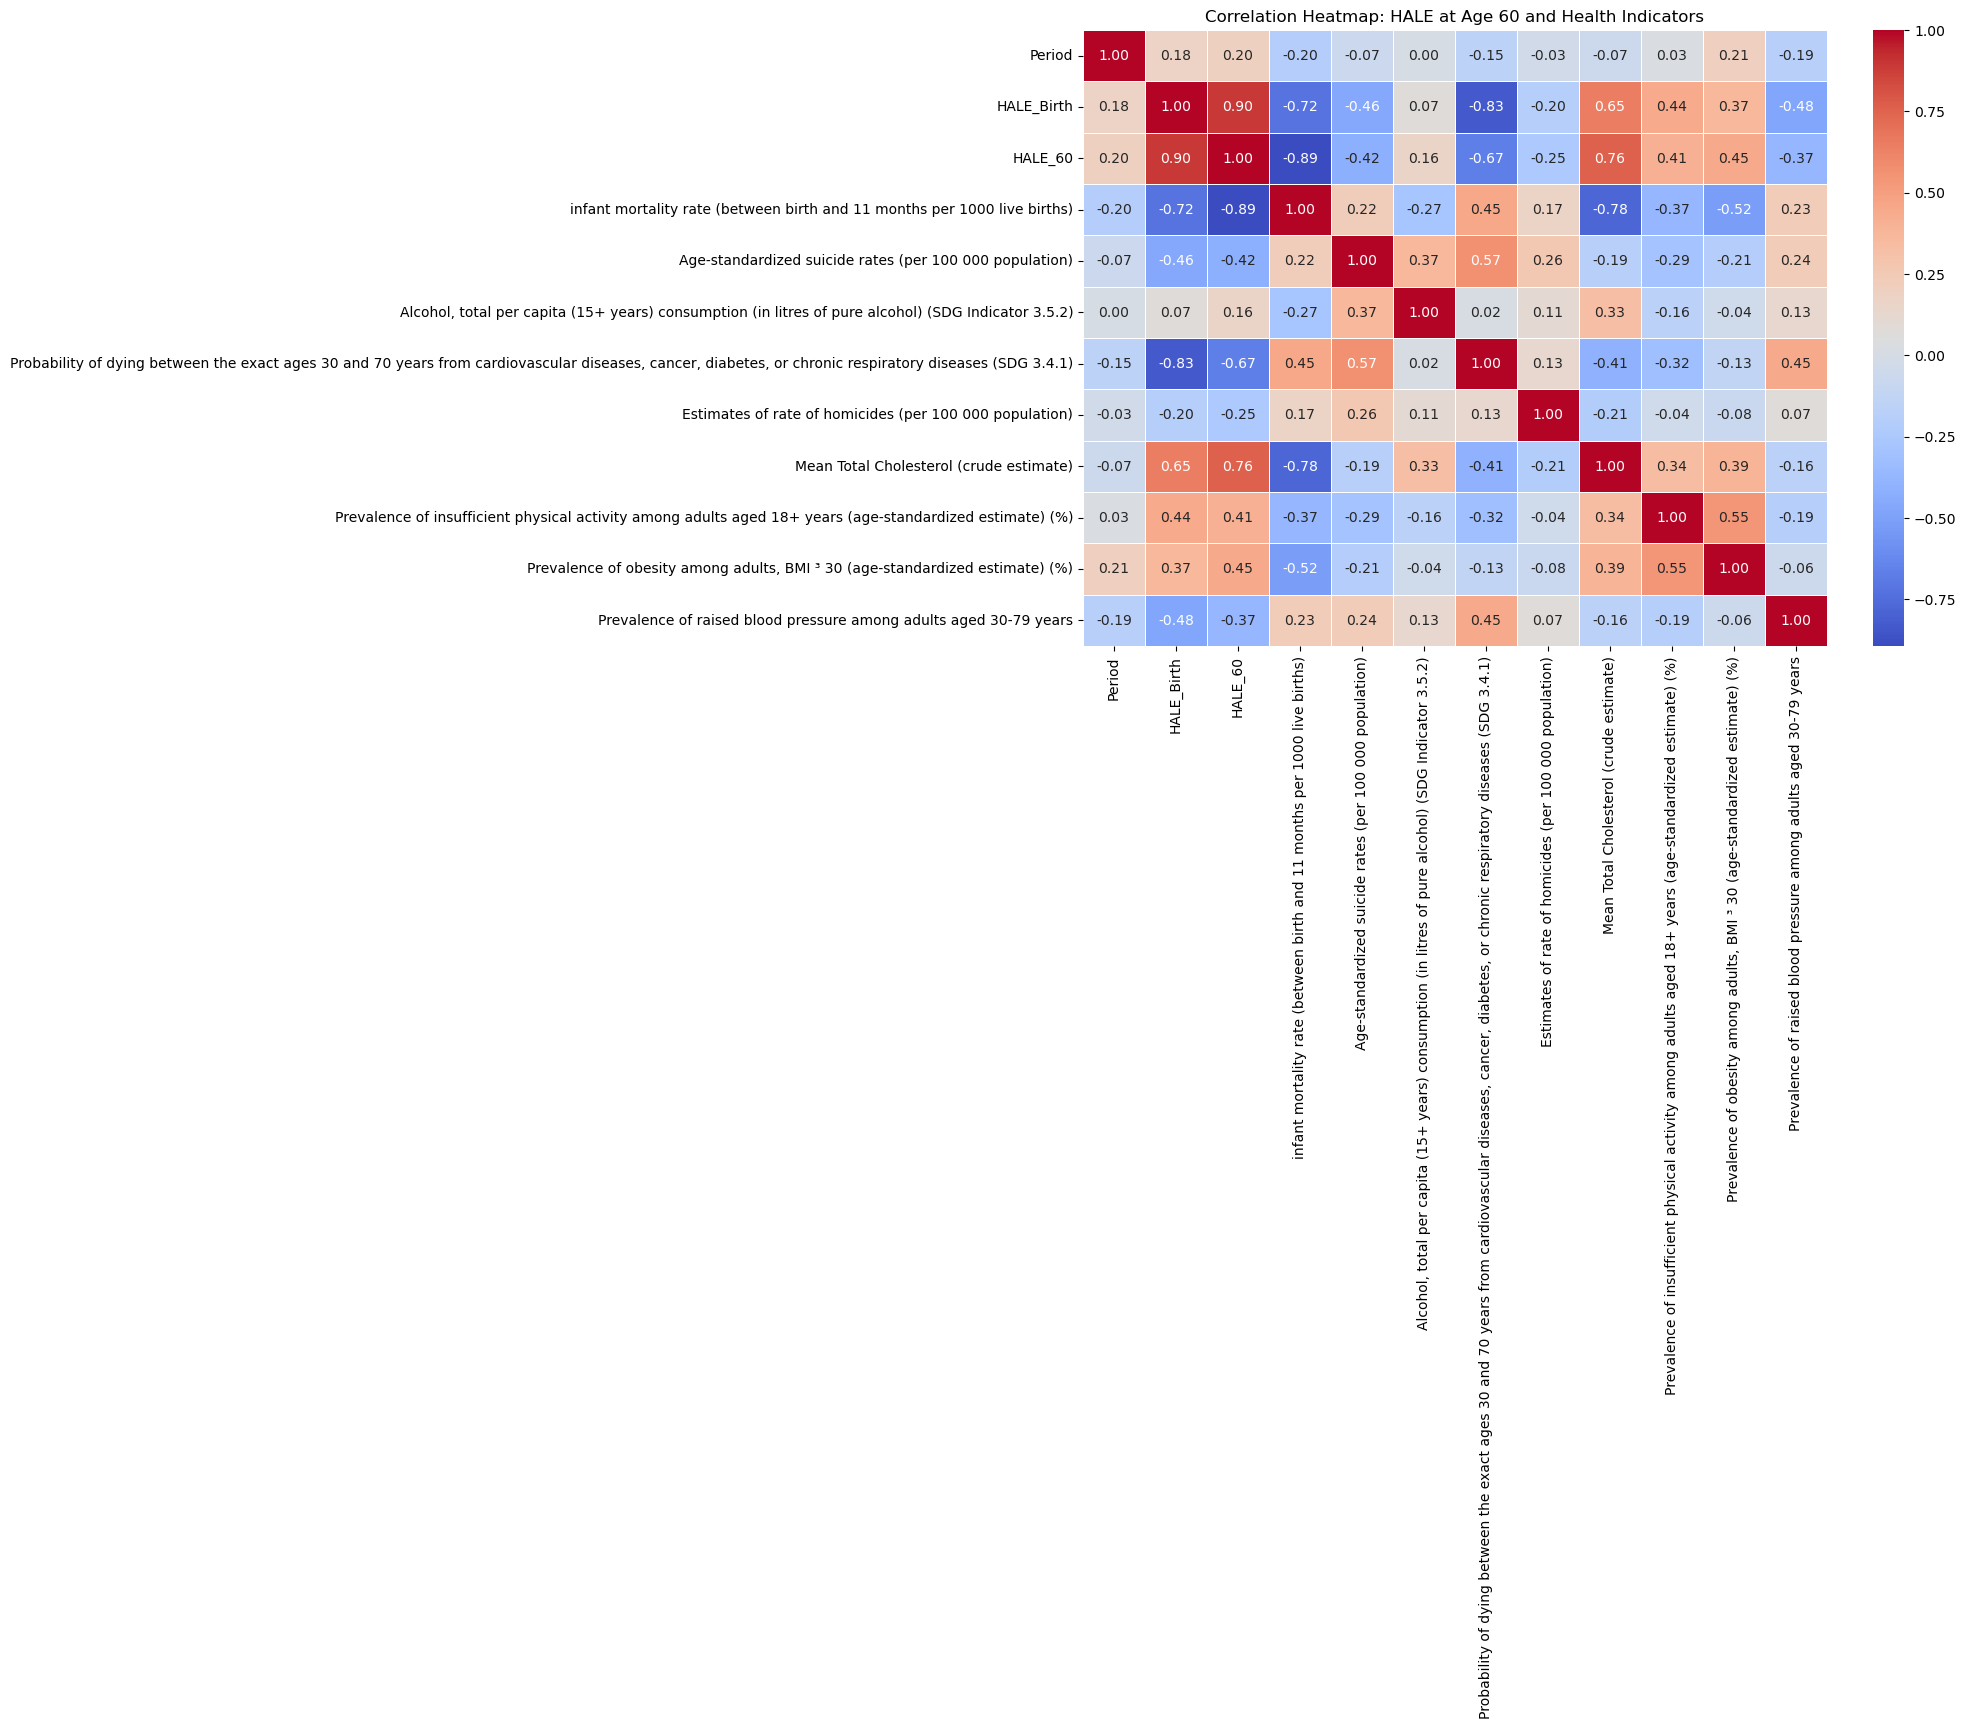

In [29]:
numeric_data = data.select_dtypes(include='number')

# Now generate the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap: HALE at Age 60 and Health Indicators")
plt.show()

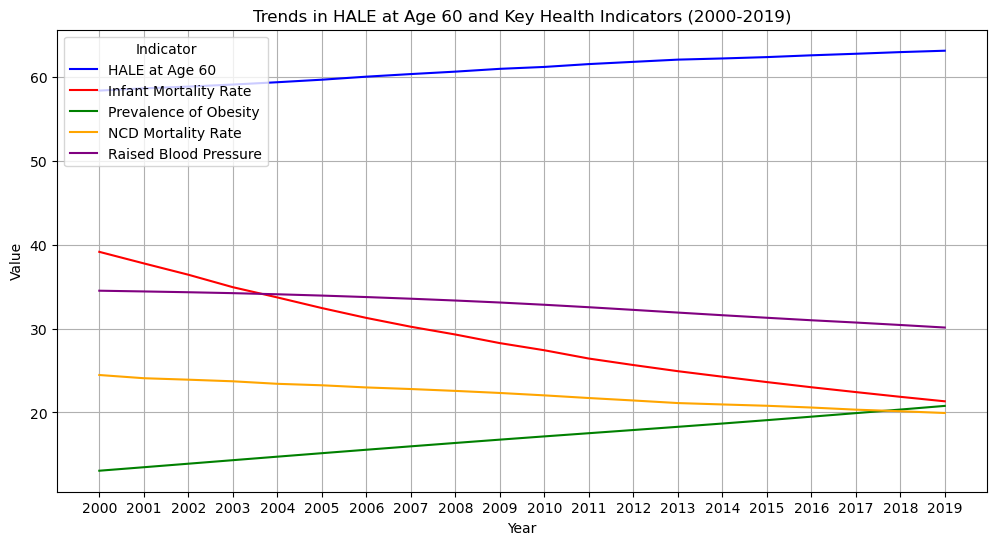

In [40]:
# Time series analysis for HALE at Age 60 and key indicators (2000-2019)
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period', y='HALE_60', label='HALE at Age 60', ci=None, color='blue')
sns.lineplot(data=data, x='Period', y='infant mortality rate (between birth and 11 months per 1000 live births)', label='Infant Mortality Rate', ci=None, color='red')
sns.lineplot(data=data, x='Period', y='Prevalence of obesity among adults, BMI ³ 30 (age-standardized estimate) (%)', label='Prevalence of Obesity', ci=None, color='green')
sns.lineplot(data=data, x='Period', y='Probability of dying between the exact ages 30 and 70 years from cardiovascular diseases, cancer, diabetes, or chronic respiratory diseases (SDG 3.4.1)', label='NCD Mortality Rate', ci=None, color='orange')
sns.lineplot(data=data, x='Period', y='Prevalence of raised blood pressure among adults aged 30-79 years', label='Raised Blood Pressure', ci=None, color='purple')

plt.title("Trends in HALE at Age 60 and Key Health Indicators (2000-2019)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="Indicator", loc='upper left')
plt.grid(True)
plt.xticks(ticks=range(2000, 2020, 1))
plt.show()


In [42]:
# Categorize countries by high and low Infant Mortality and Obesity
data['Infant_Mortality_Category'] = data['infant mortality rate (between birth and 11 months per 1000 live births)'].apply(lambda x: 'High' if x > data['infant mortality rate (between birth and 11 months per 1000 live births)'].median() else 'Low')
data['Obesity_Category'] = data['Prevalence of obesity among adults, BMI ³ 30 (age-standardized estimate) (%)'].apply(lambda x: 'High' if x > data['Prevalence of obesity among adults, BMI ³ 30 (age-standardized estimate) (%)'].median() else 'Low')



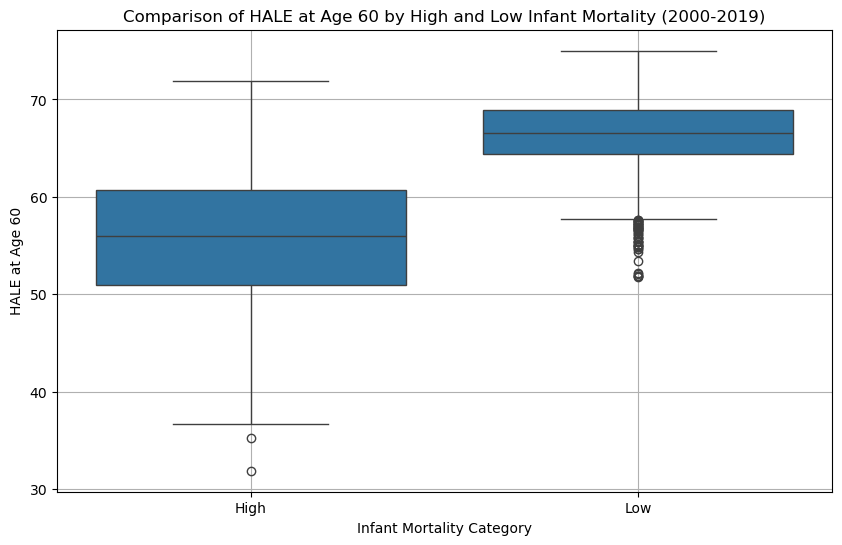

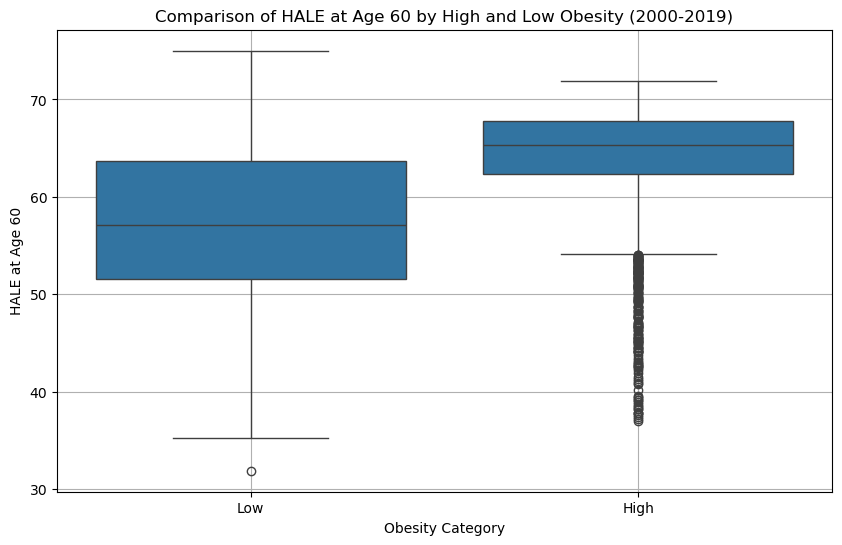

In [43]:
# Boxplot for Infant Mortality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Infant_Mortality_Category', y='HALE_60', data=data)
plt.title("Comparison of HALE at Age 60 by High and Low Infant Mortality (2000-2019)")
plt.xlabel("Infant Mortality Category")
plt.ylabel("HALE at Age 60")
plt.grid(True)
plt.show()

# Boxplot for Obesity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Category', y='HALE_60', data=data)
plt.title("Comparison of HALE at Age 60 by High and Low Obesity (2000-2019)")
plt.xlabel("Obesity Category")
plt.ylabel("HALE at Age 60")
plt.grid(True)
plt.show()


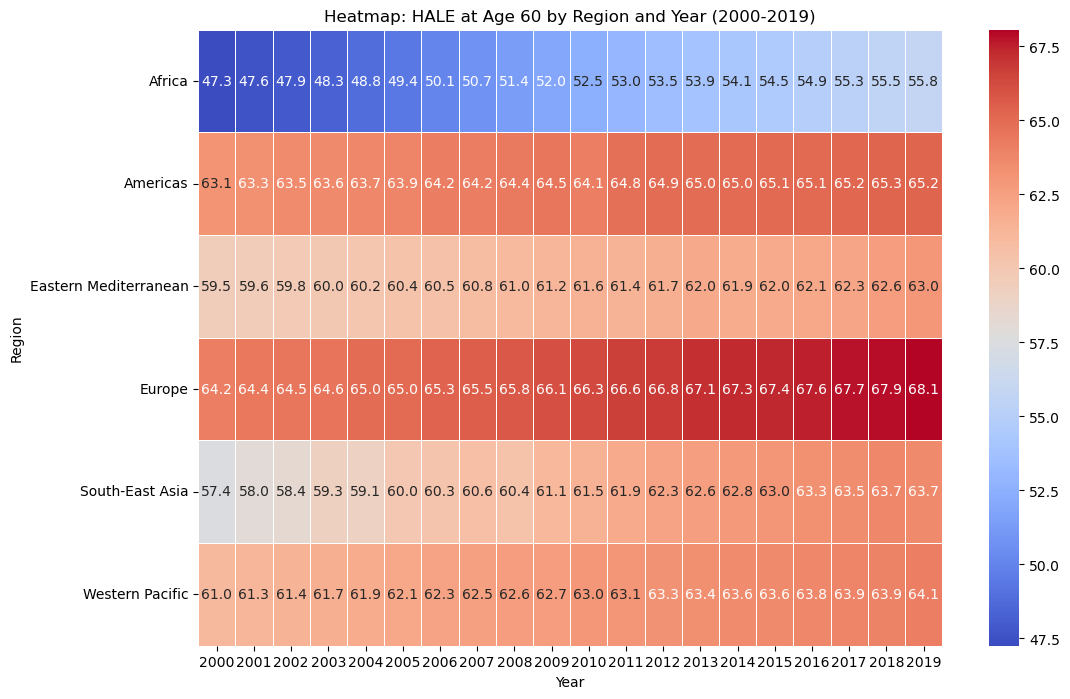

In [44]:
# Heatmap with annotations for HALE at Age 60 by region and year
heatmap_data = data.pivot_table(index='ParentLocation', columns='Period', values='HALE_60')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title("Heatmap: HALE at Age 60 by Region and Year (2000-2019)")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()


# General Trends Over Time

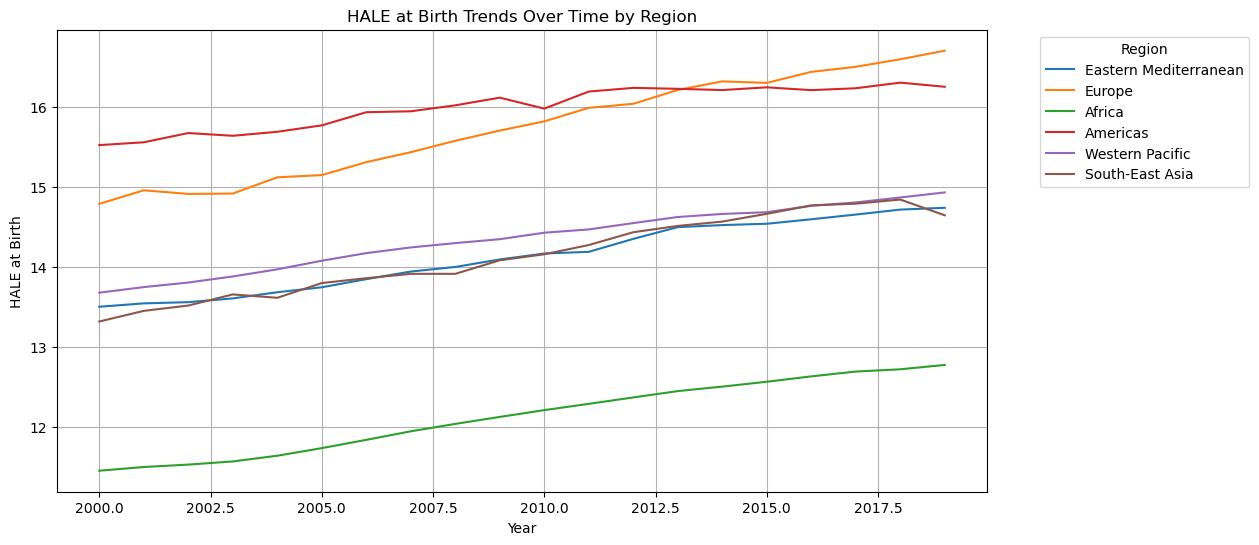

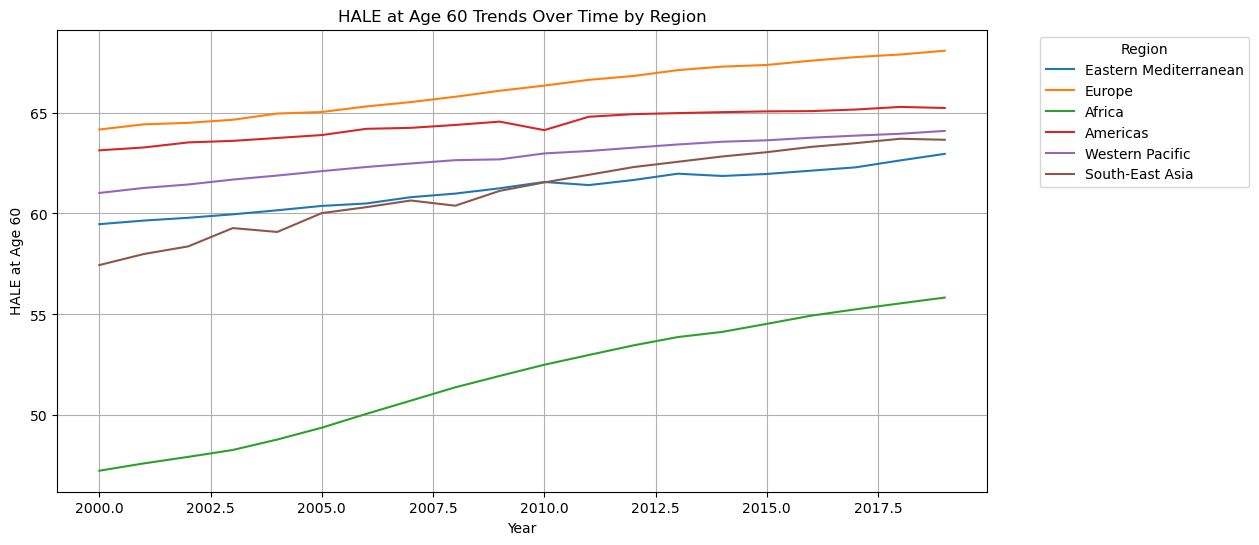

In [35]:
import seaborn as sns

# Line plot for HALE at Birth over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period', y='HALE_Birth', hue='ParentLocation', ci=None)
plt.title("HALE at Birth Trends Over Time by Region")
plt.xlabel("Year")
plt.ylabel("HALE at Birth")
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Line plot for HALE at Age 60 over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period', y='HALE_60', hue='ParentLocation', ci=None)
plt.title("HALE at Age 60 Trends Over Time by Region")
plt.xlabel("Year")
plt.ylabel("HALE at Age 60")
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Year-on-Year Percentage Change in HALE

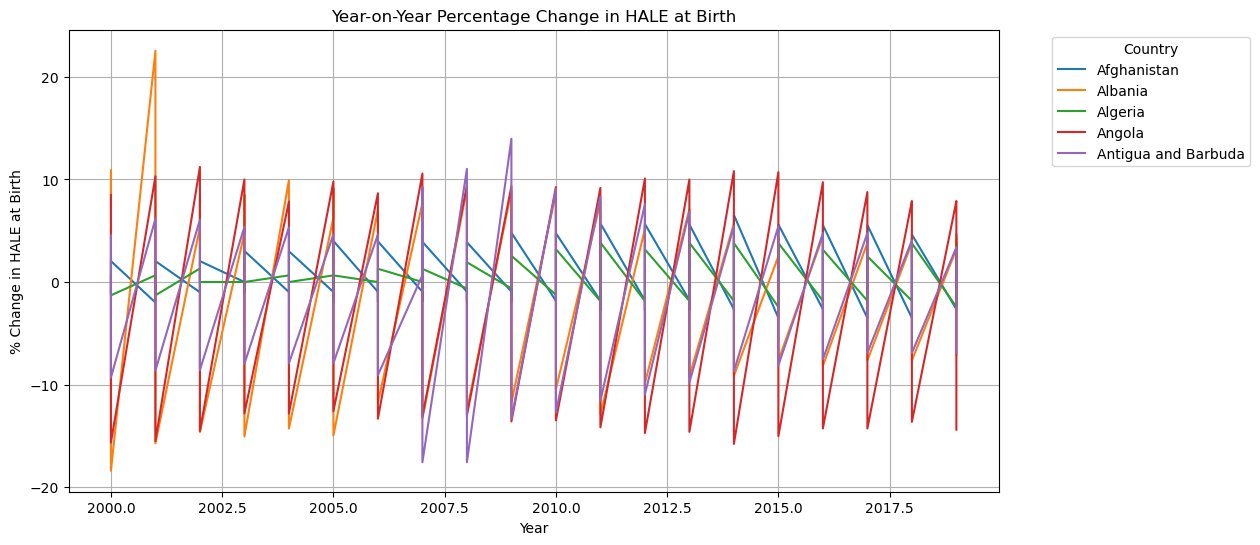

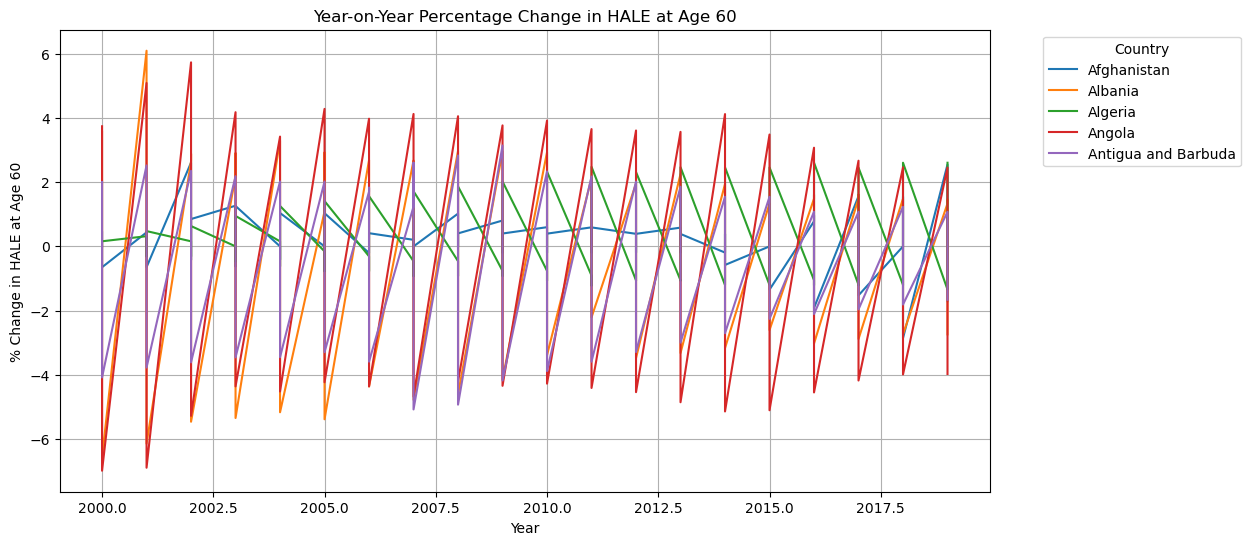

In [36]:
# Calculating year-on-year percentage change for HALE
data['HALE_Birth_pct_change'] = data.groupby('Location')['HALE_Birth'].pct_change() * 100
data['HALE_60_pct_change'] = data.groupby('Location')['HALE_60'].pct_change() * 100

# Plot for percentage change in HALE at Birth for selected countries
selected_countries = data['Location'].unique()[:5]  # Select some countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = data[data['Location'] == country]
    plt.plot(country_data['Period'], country_data['HALE_Birth_pct_change'], label=country)
plt.title("Year-on-Year Percentage Change in HALE at Birth")
plt.xlabel("Year")
plt.ylabel("% Change in HALE at Birth")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Same plot for HALE at Age 60
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = data[data['Location'] == country]
    plt.plot(country_data['Period'], country_data['HALE_60_pct_change'], label=country)
plt.title("Year-on-Year Percentage Change in HALE at Age 60")
plt.xlabel("Year")
plt.ylabel("% Change in HALE at Age 60")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
